In [1]:
import pandas as pd
import numpy as np

In [2]:
cardio=pd.read_csv('cardio_train.csv',sep=';',index_col='id')
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69301 entries, 988 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [4]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cardio.isnull().sum().any()

False

In [6]:
import matplotlib.pyplot as plt

age               AxesSubplot(0.125,0.536818;0.110714x0.343182)
gender         AxesSubplot(0.257857,0.536818;0.110714x0.343182)
height         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
weight         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
ap_hi          AxesSubplot(0.656429,0.536818;0.110714x0.343182)
ap_lo          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
cholesterol          AxesSubplot(0.125,0.125;0.110714x0.343182)
gluc              AxesSubplot(0.257857,0.125;0.110714x0.343182)
smoke             AxesSubplot(0.390714,0.125;0.110714x0.343182)
alco              AxesSubplot(0.523571,0.125;0.110714x0.343182)
active            AxesSubplot(0.656429,0.125;0.110714x0.343182)
cardio            AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

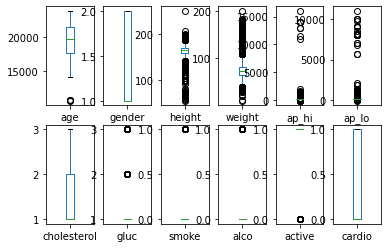

In [7]:
cardio.plot(kind='box',layout=(2,6),subplots=True)

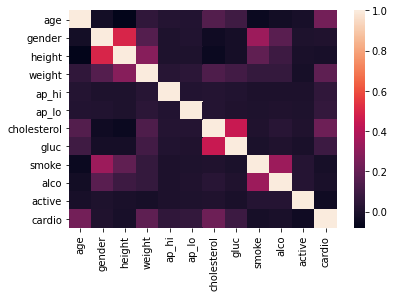

In [8]:
import seaborn as sns
sns.heatmap(cardio.corr())

In [9]:
cardio.skew()

age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [10]:
from scipy.stats import zscore

In [11]:
dt=abs(zscore(cardio))
print(dt.shape)
data=cardio.loc[(dt<3).all(axis=1)]
data.shape

(69301, 12)


(55140, 12)

In [12]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,55140.000000,55140.000000,55140.000000,55140.000000,55140.000000,55140.000000,55140.000000,55140.000000,55140.0,55140.0,55140.000000,55140.000000
mean,19437.767301,1.294305,163.895539,72.915018,125.633478,81.006493,1.269985,1.075898,0.0,0.0,0.799782,0.484712
std,2470.844131,0.455734,7.563413,13.007662,17.756821,10.206984,0.576377,0.264837,0.0,0.0,0.400167,0.499771
min,14282.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000
25%,17622.000000,1.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000
50%,19680.000000,1.000000,164.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000
75%,21307.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,309.000000,602.000000,3.000000,2.000000,0.0,0.0,1.000000,1.000000


In [13]:
data.skew()

age           -0.289501
gender         0.902729
height         0.098899
weight         0.574304
ap_hi         -0.252020
ap_lo          4.735143
cholesterol    2.018967
gluc           3.202861
smoke          0.000000
alco           0.000000
active        -1.498342
cardio         0.061184
dtype: float64

In [16]:
pd.crosstab(data['cardio'],data['gender'],normalize=True)

gender,1,2
cardio,,
0,0.367827,0.147461
1,0.337867,0.146844


In [ ]:
data.drop(data[(data['ap_hi']>data['ap_hi'].quantile(0.975))|(data['ap_hi']<data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo']>data['ap_lo'].quantile(0.975))|(data['ap_lo']<data['ap_lo'].quantile(0.025))].index,inplace=True)

In [15]:
data.shape

(52507, 12)

In [16]:
x=data.drop(columns='cardio')
y=data['cardio']
y.unique()

array([0, 1], dtype=int64)

In [17]:
print(x.shape)
print(y.shape)

(52507, 11)
(52507,)


In [18]:
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.25)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_score:
        max_score=r2sc
        final=r
print('The maxscore',r2sc,'is for final state',r)
print('Score of model',lr.score(x_train,y_train))
print('Accuracy score of model',accuracy_score(y_test,y_pred))
print('Confussion matrics',confusion_matrix(y_test,y_pred))
print('classification report',classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
print('Cross val score',cross_val_score(lr,x,y,cv=10).mean())
           
    

The maxscore -0.1944728194136387 is for final state 99
Score of model 0.6953783646521077
Accuracy score of model 0.7017597318503846
Confussion matrics [[5273 1524]
 [2391 3939]]
classification report               precision    recall  f1-score   support

           0       0.69      0.78      0.73      6797
           1       0.72      0.62      0.67      6330

    accuracy                           0.70     13127
   macro avg       0.70      0.70      0.70     13127
weighted avg       0.70      0.70      0.70     13127

Cross val score 0.7010302763192497


In [20]:
from sklearn.tree import DecisionTreeClassifier
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.25)
    dt=DecisionTreeClassifier('entropy')
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_score:
        max_score=r2sc
        final=r
print('The maxscore',max_score,'is for final state',r)
print('Score of model',dt.score(x_train,y_train))
print('Accuracy score of model',accuracy_score(y_test,y_pred))
print('Confussion matrics',confusion_matrix(y_test,y_pred))
print('classification report',classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
print('Cross val score',cross_val_score(dt,x,y,cv=10).mean())
           

The maxscore 0 is for final state 99
Score of model 0.9996952767902488
Accuracy score of model 0.6349508646301516
Confussion matrics [[4423 2374]
 [2418 3912]]
classification report               precision    recall  f1-score   support

           0       0.65      0.65      0.65      6797
           1       0.62      0.62      0.62      6330

    accuracy                           0.63     13127
   macro avg       0.63      0.63      0.63     13127
weighted avg       0.63      0.63      0.63     13127

Cross val score 0.6270781692376055


In [21]:
from sklearn.neighbors import KNeighborsClassifier
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.25)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_score:
        max_score=r2sc
        final=r
print('The maxscore',max_score,'is for final state',r)
print('Score of model',kn.score(x_train,y_train))
print('Accuracy score of model',accuracy_score(y_test,y_pred))
print('Confussion matrics',confusion_matrix(y_test,y_pred))
print('classification report',classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
print('Cross val score',cross_val_score(kn,x,y,cv=10).mean())

The maxscore 0 is for final state 99
Score of model 0.7759268664296597
Accuracy score of model 0.6769254208882456
Confussion matrics [[4915 1882]
 [2359 3971]]
classification report               precision    recall  f1-score   support

           0       0.68      0.72      0.70      6797
           1       0.68      0.63      0.65      6330

    accuracy                           0.68     13127
   macro avg       0.68      0.68      0.68     13127
weighted avg       0.68      0.68      0.68     13127

Cross val score 0.6757002911010147


In [22]:
from sklearn.naive_bayes import GaussianNB
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.25)
    gb=GaussianNB()
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_score:
        max_score=r2sc
        final=r
print('The maxscore',max_score,'is for final state',r)
print('Score of model',gb.score(x_train,y_train))
print('Accuracy score of model',accuracy_score(y_test,y_pred))
print('Confussion matrics',confusion_matrix(y_test,y_pred))
print('classification report',classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
print('Cross val score',cross_val_score(gb,x,y,cv=10).mean())

The maxscore 0 is for final state 99
Score of model 0.7071863890299644
Accuracy score of model 0.7091490820446408
Confussion matrics [[5576 1221]
 [2597 3733]]
classification report               precision    recall  f1-score   support

           0       0.68      0.82      0.74      6797
           1       0.75      0.59      0.66      6330

    accuracy                           0.71     13127
   macro avg       0.72      0.71      0.70     13127
weighted avg       0.72      0.71      0.70     13127

Cross val score 0.7082293331882362


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
grb=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(grb,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

In [ ]:

max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.25)
    grb=GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
    grb.fit(x_train,y_train)
    y_pred=grb.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_score:
        max_score=r2sc
        final=r
print('The maxscore',max_score,'is for final state',r)
print('Score of model',grb.score(x_train,y_train))
print('Accuracy score of model',accuracy_score(y_test,y_pred))
print('Confussion matrics',confusion_matrix(y_test,y_pred))
print('classification report',classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
print('Cross val score',cross_val_score(grb,x,y,cv=10).mean())

In [ ]:
from sklearn.externals import joblib
joblib.dump(grb,'Cardio')